# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 18 de Mayo 11:59 pm**

## Librerias

In [1]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
#matplotlib.rcParams['animation.embed_limit'] = 2**128

# Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros, 

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$, 
$dt = 0.01 \text{ s }$

y tomando gravedad como, 

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos, 

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica. 

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma, 

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [ ]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;
    
double fx(double vx) {
    return -b*vx/m;
}

double fy(double vy) {
    return -g -(b*vy/m);
}
    
int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;
    
    double pos_x[N];
    double pos_y[N];

    for(int i = 0; i <N; i++){
        pos_x[i] = vx_init*i*dt;
        pos_y[i] = y_init + vy_init*i*dt - 0.5*g*pow(i*dt, 2);     
    }

    for(int i = 0; i <N; i++){
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }
    
    std::ofstream myfile;
    myfile.open ("x_values.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();

    // su codigo aqui
    
    vector<double> vxs(N);
    vector<double> xs(N);
    vector<double> vys(N);
    vector<double> ys(N);
    
    vxs[0] = vx_init; // vx0
    xs[0] = x_init; // x0
    vys[0] = vy_init; // vy0
    ys[0] = y_init; // y0
    
    double v1x;
    double v1y;
    double x1;
    double y1;
    
    for(int t = 1; t < N; t++) {
        
        double k1x = dt * vx_init;
        double l1x = dt * fx(vx_init);
        double k1y = dt * vy_init;
        double l1y = dt * fy(vx_init);
    
        double k2x = dt * (vx_init + (l1x/2));
        double l2x = dt * fx(vx_init + (l1x/2));
        double k2y = dt * (vy_init + (l1y/2));
        double l2y = dt * fy(vy_init + (l1y/2));
        
        double k3x = dt * (vx_init + (l2x/2));
        double l3x = dt * fx(vx_init + (l2x/2));
        double k3y = dt * (vy_init + (l2y/2));
        double l3y = dt * fy(vy_init + (l2y/2));        
                
        double k4x = dt * (vx_init + l3x);
        double l4x = dt * fx(vx_init + l3x);
        double k4y = dt * (vy_init + l3y);
        double l4y = dt * fy(vy_init + l3y);
        
        v1x = vx_init + ((l1x + 2*l2x + 2*l3x + l4x)/6);
        //vxs.push_back(v1x);
        vxs[t] = v1x;
        vx_init = v1x;
        
        x1 = x_init + ((k1x + 2*k2x + 2*k3x + k4x)/6);
        //xs.push_back(x1);
        xs[t] = x1;
        x_init = x1;

        
        v1y = vy_init + ((l1y + 2*l2y + 2*l3y + l4y)/6);
        //vys.push_back(v1y);
        vys[t] = v1y;
        vy_init = v1y;
        
        y1 = y_init + ((k1y + 2*k2y + 2*k3y + k4y)/6);
        //ys.push_back(y1);
        ys[t] = y1;
        y_init = y1;
    }
    
    std::ofstream myfile1;
    myfile1.open ("x_values_damped.csv");
    myfile1 << "x,y\n";
    for(int i = 0; i < N; i++){
        myfile1 << xs[i] << ",";
        myfile1 << ys[i] << "\n";
    }
    myfile1.close();


    return 0;
}

Writing parabolico.cpp


In [ ]:
%%script bash

g++ parabolico.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.1 10.0995 0.2 10.198 0.3 10.2955 0.4 10.392 0.5 10.4875 0.6 10.582 0.7 10.6755 0.8 10.768 0.9 10.8595 1 10.95 1.1 11.0395 1.2 11.128 1.3 11.2155 1.4 11.302 1.5 11.3875 1.6 11.472 1.7 11.5555 1.8 11.638 1.9 11.7195 2 11.8 2.1 11.8795 2.2 11.958 2.3 12.0355 2.4 12.112 2.5 12.1875 2.6 12.262 2.7 12.3355 2.8 12.408 2.9 12.4795 3 12.55 3.1 12.6195 3.2 12.688 3.3 12.7555 3.4 12.822 3.5 12.8875 3.6 12.952 3.7 13.0155 3.8 13.078 3.9 13.1395 4 13.2 4.1 13.2595 4.2 13.318 4.3 13.3755 4.4 13.432 4.5 13.4875 4.6 13.542 4.7 13.5955 4.8 13.648 4.9 13.6995 5 13.75 5.1 13.7995 5.2 13.848 5.3 13.8955 5.4 13.942 5.5 13.9875 5.6 14.032 5.7 14.0755 5.8 14.118 5.9 14.1595 6 14.2 6.1 14.2395 6.2 14.278 6.3 14.3155 6.4 14.352 6.5 14.3875 6.6 14.422 6.7 14.4555 6.8 14.488 6.9 14.5195 7 14.55 7.1 14.5795 7.2 14.608 7.3 14.6355 7.4 14.662 7.5 14.6875 7.6 14.712 7.7 14.7355 7.8 14.758 7.9 14.7795 8 14.8 8.1 14.8195 8.2 14.838 8.3 14.8555 8.4 14.872 8.5 14.8875 8.6 14.902 8.7 14.9155 8.

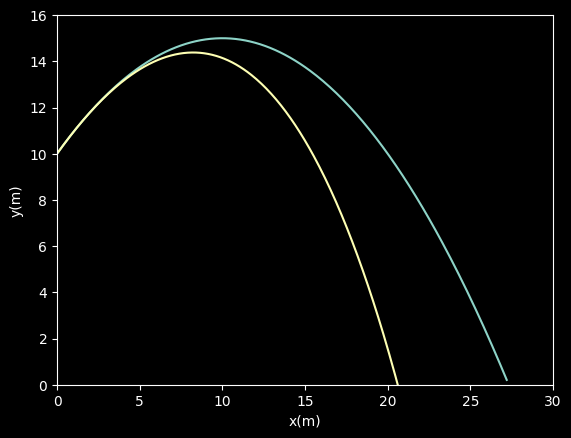

In [ ]:
df = pd.read_csv("./x_values.csv")
df_damped = pd.read_csv("./x_values_damped.csv")
x = np.array(df["x"])
y = np.array(df["y"])
x_damped = np.array(df_damped["x"])
y_damped = np.array(df_damped["y"])

plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y)
plt.plot(x_damped, y_damped)
plt.show()

In [ ]:
%%script bash

rm parabolico x_values.csv x_values_damped.csv

## Problema 2

Considere el sistema resorte pendulo que se muestra en la figura, el resorte está atado a una masa $m_1$ y el pendulo a una masa $m_2$, considere $l_0$ la longitud sin estirar del resorte, y $l$ la longitud del pendulo. El resorte con la masa $m_1$ se mueve en la dirección $x$ sin fricción.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/image2_p2.png)

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema resorte-pendulo son las siguientes, considerando la posición de la masa unida al resorte $x_1 = 0$ cuando el resorte está sin estirar, 

\begin{align}	
m_1 \ddot x_1 &= - k x_1 + T \sin \theta \\
m_2 \ddot x_2 &= - T \sin \theta \\
m_2 \ddot y_2 &=  T \cos \theta - m_2g \\
\ddot x_2 &= \ddot x_1 - \dot\theta^2 l \sin \theta + \ddot\theta l \cos \theta \\
\ddot y_2 &= \dot\theta^2 l \cos \theta + \ddot\theta l \sin \theta\\
\end{align}

Sus ecuaciones aquí,


Para la masa $m_1$ tenemos:

\begin{align}	
\sum F_x &= - k x_1 + T \sin \theta = m_1\ddot{x_1} \\
\end{align}

Para la masa $m_2$ tenemos:

\begin{align}	
\sum F_x &= - T \sin \theta = m_2\ddot{x_2} \\
\sum F_y &= T \cos \theta - m_2g = m_2\ddot{y_2} \\
\end{align}

Finalmente, para las ecuaciones de ligadura nos basamos en la geometría del péndulo.
La primera ecuación de ligadura es:

\begin{align}	
x_2 = x_1 + l\sin\theta \\
\dot{x_2} = \dot{x_1} + l \dot\theta \cos\theta \\
\ddot{x_2} = \ddot{x_1} - l \dot\theta^2 \sin\theta + l\ddot\theta \cos\theta\\
\end{align}

y la segunda:
 
\begin{align}	
y_2 = -l\cos\theta \\
\dot{y_2} = l\dot\theta \sin\theta \\
\ddot{y_2} = l\dot\theta^2\cos\theta + l\ddot\theta\sin\theta
\end{align}




b) Dado que el sistema se puede especificar en términos de solamente dos coordenadas $(x_1, \theta)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las dos siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot x_1 = \frac{-k x_1 + m_2 \dot \theta^2 l \sin \theta}{ m_1+m_2}- \frac{m_2 (k x_1 - m_2 \dot \theta^2 l \sin \theta -g(m_1 + m_2) \tan \theta )}{ (m_1+m_2) (m_1\tan^2 \theta + m_2) }
\end{equation}

\begin{equation}
\ddot \theta = \frac{k x_1 - m_2 \dot \theta^2 l \sin \theta - g(m_1+m_2) \tan \theta}{ l(m_1+m_2)\sin \theta \tan \theta + m_1 l \cos \theta }
\end{equation}

Se deben imprimir las dos ecuaciones resultantes de forma simplificada en el notebook. 

In [ ]:
## su codigo aqui 

m1, m2, g, l, k, t = sym.symbols('m1 m2 g l k t')
x1 = sym.Function('x1')(t)
x2 = sym.Function('x2')(t)
y2 = sym.Function('y2')(t)
theta = sym.Function('theta')(t)
T = sym.Function('T')(t)

x1_dot = sym.diff(x1, t)
x1_ddot = sym.diff(x1, t, t)
x2_dot = sym.diff(x2, t)
x2_ddot = sym.diff(x2, t, t)
y2_dot = sym.diff(y2, t)
y2_ddot = sym.diff(y2, t, t)
theta_dot = sym.diff(theta, t)
theta_ddot = sym.diff(theta, t, t)

eq1 = m1 * x1_ddot + k * x1 - T * sym.sin(theta)
eq2 = m2 * x2_ddot + T * sym.sin(theta)
eq3 = m2 * y2_ddot - T * sym.cos(theta) + m2 * g
eq4 = x2_ddot - x1_ddot + theta_dot**2 * l * sym.sin(theta) - theta_ddot * l * sym.cos(theta)
eq5 = y2_ddot - theta_dot**2 * l * sym.cos(theta) - theta_ddot * l * sym.sin(theta)

solution = sym.solve([eq1, eq2, eq3, eq4, eq5], (x1_ddot, x2_ddot, y2_ddot, theta_ddot, T))
x1_ddot_solution = sym.simplify(solution[x1_ddot])
theta_ddot_solution = sym.simplify(solution[theta_ddot])

theta_ddot_solution, x1_ddot_solution


⎛                                                                             
⎜                                                                        ⎛d   
⎜                                                       l⋅m₂⋅sin(2⋅θ(t))⋅⎜──(θ
⎜                                                                        ⎝dt  
⎜-g⋅m₁⋅sin(θ(t)) - g⋅m₂⋅sin(θ(t)) + k⋅x₁(t)⋅cos(θ(t)) - ──────────────────────
⎜                                                                    2        
⎜─────────────────────────────────────────────────────────────────────────────
⎜                                 ⎛           2      ⎞                        
⎝                               l⋅⎝m₁ + m₂⋅sin (θ(t))⎠                        

     2                                                         ⎞
    ⎞                                                          ⎟
(t))⎟                                                         2⎟
    ⎠   g⋅m₂⋅sin(2⋅θ(t))                            ⎛d       ⎞ ⎟
──────  ──────────────── - k

## Problema 3

A partir de las ecuaciones de segundo grado del problema 1, resuelva las ecuaciones diferenciales anteriores, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación, 

https://www.youtube.com/watch?v=yTXhcYtohvk

Para la simulación use los siguientes parametros:

$l_0 = 1 \text{ m}, \quad l = 1 \text{ m}, \quad m_1 = 8 \text{ kg}, \quad m_2 = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta_0= 70^\circ, \quad \omega_0 = 0 \quad T_\text{total} = 5 \text{ s}, \quad x_{10} = 1 \text{ m }$, $dt = 0.005 \text{ s }, v_0 = 0$.

In [14]:
# parámetros del problema
# idealmente no modificar mucho esta parte del codigo para facilitar la evaluacion

g = 9.8 # m/s^2
l = 1 # m longitud del pendulo
m1 = 8 # kg
m2 = 10 # kg
k = 300 # N/m
l0 = 1 # m longitud del resorte sin estirar

tiempo = 5 # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta = 70 * np.pi/180 # angulo inicial respecto a la vertical (rad)
x = 1  # posición inicial con respecto a la longitud del resorte sin estirar
x2 = x + l * np.sin(theta) # posición inicial de la masa 2 con respecto a la longitud del resorte sin estirar
y2 = - l * np.cos(theta) # posición inicial de la masa 2 con respecto a la longitud del resorte sin estirar
v = 0.0 # velocidad angular inicial respecto a la vertical (rad/s)
omega = 0

In [6]:
## su codigo aqui


def f_x1_ddot(theta, theta_dot, x1):
    num = ( g*m2*np.sin(2*theta) / 2) - k*x1 + l*m2*(theta_dot**2)*np.sin(theta) 
    den = m1 + m2*(np.sin(theta)**2)
    return num / den

def f_theta_ddot(theta, theta_dot, x1):
    num = - g*m1*np.sin(theta) - g*m2*np.sin(theta) + k*x1*np.cos(theta) - l*m2*(theta_dot**2)*np.sin(2*theta)/2     
    den = l*(m1+m2*(np.sin(theta)**2))
    return num/den

def rk4_segundo_grado(fx, ftheta, N , h = 0.005):

    v0 = v
    x0 = x
    vs = [v0]
    xs = [x0]
    
    omega0 = omega
    theta0 = theta
    omegas = [omega0]
    thetas = [theta0]
  
    #h_medios = h*0.5
    #un_sexto = 1.0 / 6.0

    for i in range(N):

        l1_x = h * fx(theta0, omega0, x0)
        k1_x = h * v0
        l1_theta = h * ftheta(theta0, omega0, x0)
        k1_theta = h * omega0
        
        
        l2_x = h * fx(theta0 + 0.5*k1_theta, omega0 + 0.5*l1_theta, x0 + 0.5*k1_x)
        k2_x = h * (v0 + 0.5*l1_x)
        l2_theta = h * ftheta(theta0 + 0.5*k1_theta, omega0 + 0.5*l1_theta, x0 + 0.5*k1_x)
        k2_theta = h * (omega0 + 0.5*l1_theta)

        
        l3_x = h * fx(theta0 + 0.5*k2_theta, omega0 + 0.5*l2_theta, x0 + 0.5*k2_x)
        k3_x = h * (v0 + 0.5*l2_x)
        l3_theta = h * ftheta(theta0 + 0.5*k2_theta, omega0 + 0.5*l2_theta, x0 + 0.5*k2_x)
        k3_theta = h * (omega0 + 0.5*l2_theta)
        
        l4_x = h * fx(theta0 + k3_theta, omega0 + l3_theta, x0 + k3_x)
        k4_x = h * (v0 + l3_x)
        l4_theta = h * ftheta(theta0 + k3_theta, omega0 + l3_theta, x0 + k3_x)
        k4_theta = h * (omega0 + l3_theta)
        
        v1 = v0 + (l1_x + 2*l2_x + 2*l3_x + l4_x)/6 
        vs.append(v1)
        v0 = v1
        x1 = x0 + (k1_x + 2*k2_x + 2*k3_x + k4_x)/6
        xs.append(x1)
        x0 = x1
        
        omega1 = omega0 + (l1_theta + 2*l2_theta + 2*l3_theta + l4_theta)/6 
        omegas.append(omega1)
        omega0 = omega1
        theta1 = theta0 + (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)/6
        thetas.append(theta1)
        theta0 = theta1
        
    return np.linspace(0,tiempo,len(vs)), np.array(xs), np.array(thetas)

dt = 0.005
t, x_rk4, theta_rk4 = rk4_segundo_grado(f_x1_ddot, f_theta_ddot, puntos, h=dt)

x_rk4_mod = x_rk4.copy()
for i in range(len(x_rk4_mod)):
    x_rk4_mod[i] += 1
    #print(x_rk4_mod[i])



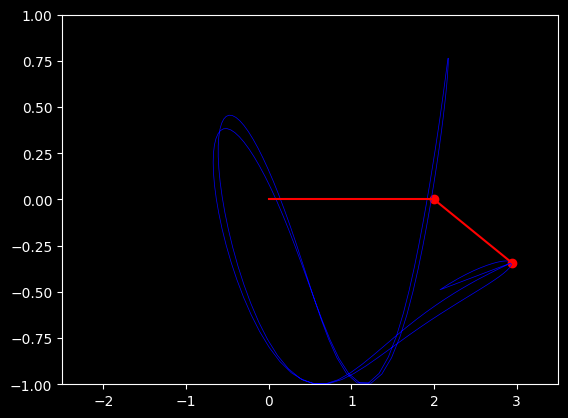

In [7]:
# su simulacion aqui

fig, ax = plt.subplots()
fig.figsize=(10, 2)
ax.set_xlim([-2.5, 3.5])
ax.set_ylim([-1, 1])

# Crear una lista para almacenar las posiciones pasadas
rastro_x = []
rastro_y = []

def update(j):

    i = j*5
    ax.clear()
    ax.set_xlim([-2.5, 3.5])
    ax.set_ylim([-1, 1])

    x1 = x_rk4_mod[i]
    y2 = -np.cos(theta_rk4[i])*l
    x2 = x1 + np.sin(theta_rk4[i])*l

    # Almacenar la posición actual en las listas de rastro
    rastro_x.append(x2)
    rastro_y.append(y2)

    # Dibujar las posiciones pasadas
    ax.plot(rastro_x, rastro_y, 'b-', linewidth=0.5)

    # Dibujar el pendulo
    ax.plot([0, x1], [0, 0], 'r-')
    ax.scatter(x1, 0, color='red')
    ax.plot([x1, x2], [0, y2], 'r-')
    ax.scatter(x2, y2, color='red')

anim = animation.FuncAnimation(fig, func = update, frames=200)

anim.save('mi_animacion1.gif', writer='imagemagick', fps=20)


start_time = time.time()
#crear_animacion(data, 0, l,m1,m2,tiempo,fps,'sistema_resorte_pendulo.gif')
#print("Tiempo usado en crear la animación (s):",time.time() - start_time)

In [ ]:
# use el siguiente codigo para evaluar el tiempo de su simulacion

print("Tiempo usado en crear la animación (s):",time.time() - start_time)

Tiempo usado en crear la animación (s): 12.752812623977661
